## Exercise 2 – Advanced Pandas Operations

In [13]:
import pandas as pd
import unicodedata

# Define the DataFrame with specified columns and data types
df_panel = pd.DataFrame({
    'Year': pd.Series(dtype='int'),
    'Rank_nr': pd.Series(dtype='int'),
    'Company': pd.Series(dtype='string'),
    'Industry': pd.Series(dtype='string'),
    'Country': pd.Series(dtype='string'),
    'Sales': pd.Series(dtype='int'),
    'Profits': pd.Series(dtype='float'),
    'Assets': pd.Series(dtype='int'),
    'Market_Value': pd.Series(dtype='int')
})

# Display the empty DataFrame
#df_panel

for year in range(2008, 2023):
    file_name = f'data/forbes-global-2000-2008-2019/Forbes Global 2000 - {year}.csv'
    df = pd.read_csv(file_name, encoding='ISO-8859-1')
    print(file_name, len(df))

    df.insert(0,'Year',year)
    df_panel = pd.concat([df_panel,df], ignore_index=True)

df_panel.reset_index(drop=True, inplace=True)
df_panel.to_csv(f'data/forbes-global-2000-2008-2019/Forbes Global 2000 -  Combined Panel Data.csv', index=False, encoding='utf-8')

df_panel['Company'] = df_panel['Company'].map(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore').strip())
df_panel['Company'] = df_panel['Company'].replace({'_':' ', '-':' '}, regex=True)
df_panel

list_company = sorted(df_panel["Company"].unique())
for company in list_company:
    df_company = df_panel[df_panel.Company == company].copy()
    df_company.sort_values(by=['Year'], ascending=True, inplace=True)

    company_name = company.replace('/', ' and ').replace(' ', '_').replace('.', '').replace(':', '').replace('?', '').replace('!', '').replace('/', '').replace('\'', '')
    df_company.to_csv(f'data/forbes-global-2000-2008-2019/Data by Company/{company_name}.csv', index=False, encoding='utf-8')


data/forbes-global-2000-2008-2019/Forbes Global 2000 - 2008.csv 2000
data/forbes-global-2000-2008-2019/Forbes Global 2000 - 2009.csv 2000
data/forbes-global-2000-2008-2019/Forbes Global 2000 - 2010.csv 2000
data/forbes-global-2000-2008-2019/Forbes Global 2000 - 2011.csv 1999
data/forbes-global-2000-2008-2019/Forbes Global 2000 - 2012.csv 1999
data/forbes-global-2000-2008-2019/Forbes Global 2000 - 2013.csv 1999
data/forbes-global-2000-2008-2019/Forbes Global 2000 - 2014.csv 1998
data/forbes-global-2000-2008-2019/Forbes Global 2000 - 2015.csv 2000
data/forbes-global-2000-2008-2019/Forbes Global 2000 - 2016.csv 1999
data/forbes-global-2000-2008-2019/Forbes Global 2000 - 2017.csv 1999
data/forbes-global-2000-2008-2019/Forbes Global 2000 - 2018.csv 2000
data/forbes-global-2000-2008-2019/Forbes Global 2000 - 2019.csv 2000
data/forbes-global-2000-2008-2019/Forbes Global 2000 - 2020.csv 2000
data/forbes-global-2000-2008-2019/Forbes Global 2000 - 2021.csv 2000
data/forbes-global-2000-2008-2019/

In [43]:

df_panel_1 = df_panel[df_panel.Year == 2022].copy()

df_panel_1.dropna(inplace=True)
# It is important to reset a zero-based index when dropping rows with missing values although in this case it is not necessary
df_panel_1.reset_index(drop=True, inplace=True)

descriptive_report = df_panel_1.describe(include='all')
dataTypes = pd.DataFrame(df_panel_1.dtypes, columns=['Data Type']).transpose()
missingValues = pd.DataFrame(df_panel_1.isnull().sum(),columns=['Missing Values']).transpose()
presentValues = pd.DataFrame(df_panel_1.count(),columns=['Present Values']).transpose()
data_report=pd.concat([descriptive_report, dataTypes, missingValues, presentValues], axis=0)

data_report

,Year,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value
count,2000.0,2000,2000,2000,2000,2000.0,2000.0,2000.0,2000.0
unique,NaN,1685,2000,26,58,NaN,1932.0,NaN,NaN
top,NaN,1959,Berkshire Hathaway,Banking,United States,NaN,781.0,NaN,NaN
freq,NaN,4,1,290,584,NaN,3.0,NaN,NaN
mean,2022.0,NaN,NaN,NaN,NaN,23886.202,NaN,117114.2185,38238.4255
std,0.0,NaN,NaN,NaN,NaN,40942.544294,NaN,363745.753098,117207.269875
min,2022.0,NaN,NaN,NaN,NaN,0.0,NaN,166.0,144.0
25%,2022.0,NaN,NaN,NaN,NaN,5604.0,NaN,14790.75,7325.75
50%,2022.0,NaN,NaN,NaN,NaN,12167.5,NaN,32007.0,16625.5
75%,2022.0,NaN,NaN,NaN,NaN,23742.5,NaN,77870.25,34712.0


<Axes: >

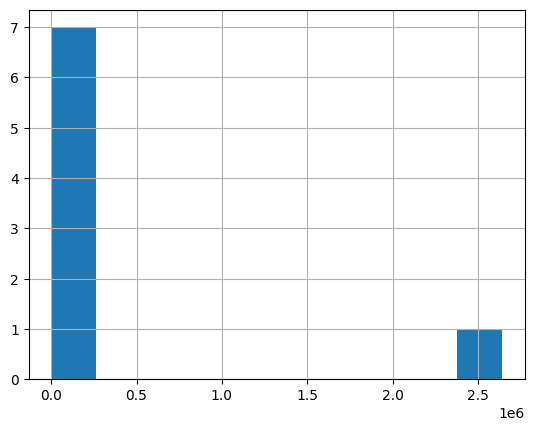

In [44]:

descriptive_report['Market_Value'].hist()

In [45]:
print('Skewness of Market_Value is {}'.format(descriptive_report['Market_Value'].skew()))

Skewness of Market_Value is 2.819037525111361


<Axes: >

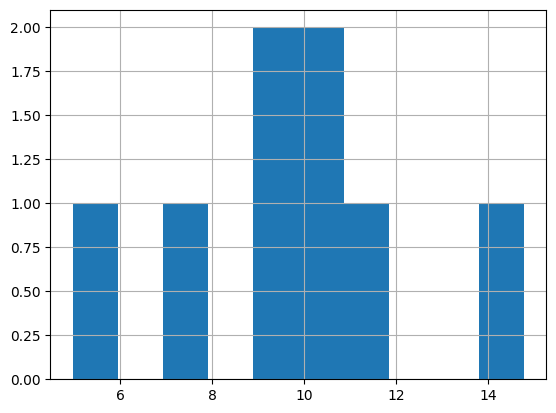

In [46]:
import numpy as np

descriptive_report['Log_Market_Value'] = np.log(descriptive_report['Market_Value'])
descriptive_report['Log_Market_Value'].hist()

In [47]:
# Skewness index close to 0 indicates a normal distribution
print('Skewness of Market_Value is {}'.format(descriptive_report['Log_Market_Value'].skew()))

Skewness of Market_Value is 0.0130657627640816


In [48]:
descriptive_report_ivs = descriptive_report[['Sales', 'Profits', 'Assets', 'Market_Value']]
descriptive_report_ivs.corr(method='pearson')

,Sales,Profits,Assets,Market_Value
Sales,1.000000,NaN,0.999636,0.999436
Profits,NaN,1.0,NaN,NaN
Assets,0.999636,NaN,1.000000,0.999764
Market_Value,0.999436,NaN,0.999764,1.000000


<Axes: >

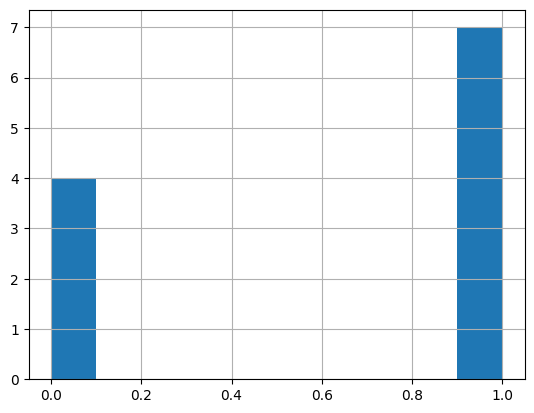

In [49]:
descriptive_report['Market_Value_Binary'] = np.where(descriptive_report['Market_Value'] <= descriptive_report['Market_Value'].median(), 0, 1)
descriptive_report['Market_Value_Binary'].hist()